# Question 1 #
## Gumtree Property Information Scraper ##

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


url = 'https://www.gumtree.co.za/s-houses-flats-for-sale/johannesburg/v1c9074l3100090p1'
response = requests.get(url)
soup = BeautifulSoup(response.content, "html")


listings = soup.find_all("span", class_="related-item has-hover has-actions-bar")

In [64]:
data = []

for item in listings:
    # Title
    t = item.find("div", class_="title title-mult-lines")
    title = t.find("span").text.strip() if t and t.find("span") else "NO title" +
    
    
    l = t  
    link = l.find("a")["href"].strip() if l and l.find("a") else "No Link"
    if link != "No Link":
        link = "https://www.gumtree.co.za" + link  # prepend base URL
    
    # Price
    p = item.find("span", class_="ad-price")
    price = p.text.strip() if p else "No Price"
    
    # Description
    d = item.find("div", class_="description-container")
    description = d.find("span").text.strip() if d and d.find("span") else "No Description"
    
    #location
    loc = item.find("span", class_="location")
    location = loc.text.strip() if loc else "No Location"
    
    #bed and bathrooms
    bedrooms = "Not specified"
    bathrooms = "Not specified"
    
    if link != "No Link":
        list_res = requests.get(link)
        list_res_soup = BeautifulSoup(list_res.content, "html")
        
        general_details = list_res_soup.find("div", class_="vip-general-details")
        if general_details:
            attributes = general_details.find_all("div", class_="attribute")
            
            # Loop over all attributes to find bedrooms and bathrooms
            for attr in attributes:
                name_tag = attr.find("span", class_="name")
                value_tag = attr.find("span", class_="value")
                if name_tag and value_tag:
                    name = name_tag.text.strip().lower()
                    value = value_tag.text.strip()
                    if "bedroom" in name:
                        bedrooms = value
                    elif "bathroom" in name:
                        bathrooms = value
        
        time.sleep(0.5)  # optional delay
    
 
    data.append({
        "Title": title,
        "Description": description,
        "Location": location,
        "Price": price,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "Listing Link": link
    })


df = pd.DataFrame(data)
df.head()

,Title,Description,Location,Price,Bedrooms,Bathrooms,Listing Link
0,Flat Forsale in Pennyville,Urgent Sale !!!!!!!!!\rFlat is being sold as i...,Soweto,"R 120,000",2,1,https://www.gumtree.co.za/a-houses-flats-for-s...
1,A Rare Gem in Eldorado Estate (Bushkoppies): Y...,"Welcome to a breathtaking sanctuary, your own ...",Other,"R 1,700,000",3,3,https://www.gumtree.co.za/a-houses-flats-for-s...
2,House - Ad posted by Ethan Van Rooyen,"House for 1.8million, main house with three be...",Other,"R 1,800,000",3,1,https://www.gumtree.co.za/a-houses-flats-for-s...
3,2-bed and 2-bath ground floor apartment for sa...,2-bed and 2-bath apartment for saleSituated in...,Randburg,"R 735,000",2,2,https://www.gumtree.co.za/a-houses-flats-for-s...
4,Pet friendly unit for sale,Soho Broadacres presents a beautiful 2 Bedroom...,Sandton,"R 1,190,000",3,2,https://www.gumtree.co.za/a-houses-flats-for-s...


In [59]:
df.to_csv("gumtree_listings.csv", index=False)
print("saved successfully")

saved successfully


### Question 2 ###
## Cleaning Data Extraction ##

In [60]:
import pandas as pd

df = pd.read_csv('gumtree_listings.csv')


df_clean = df.dropna(subset=['Price', 'Location', 'Bedrooms', 'Bathrooms'])


df_clean['Price'] = (df_clean['Price']
                    .astype(str)
                    .str.replace('R', '', regex=False)
                    .str.replace(',', '', regex=False))
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')


for col in ['Bedrooms', 'Bathrooms']:
    df_clean[col] = (df_clean[col]
                    .astype(str)
                    .str.replace('+', '', regex=False))
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


df_clean = df_clean.dropna(subset=['Price', 'Bedrooms', 'Bathrooms'])


df_clean.to_csv('cleaned_gumtree_listings.csv', index=False)

print("Data cleaning completed!")
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")
print("File saved as 'cleaned_gumtree_listings.csv'")


print("\nSample of cleaned data:")
print(df_clean.head())

Data cleaning completed!
Original rows: 20
Cleaned rows: 19
File saved as 'cleaned_gumtree_listings.csv'

Sample of cleaned data:
                                               Title  \
0                         Flat Forsale in Pennyville   
1  A Rare Gem in Eldorado Estate (Bushkoppies): Y...   
2              House - Ad posted by Ethan Van Rooyen   
3  2-bed and 2-bath ground floor apartment for sa...   
4                         Pet friendly unit for sale   

                                         Description  Location      Price  \
0  Urgent Sale !!!!!!!!!\rFlat is being sold as i...    Soweto   120000.0   
1  Welcome to a breathtaking sanctuary, your own ...     Other  1700000.0   
2  House for 1.8million, main house with three be...     Other  1800000.0   
3  2-bed and 2-bath apartment for saleSituated in...  Randburg   735000.0   
4  Soho Broadacres presents a beautiful 2 Bedroom...   Sandton  1190000.0   

   Bedrooms  Bathrooms                                       Listing L

### Question 3 ###
## Data Visualisation ##

Data shape: (19, 7)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         19 non-null     object 
 1   Description   19 non-null     object 
 2   Location      19 non-null     object 
 3   Price         19 non-null     float64
 4   Bedrooms      19 non-null     int64  
 5   Bathrooms     19 non-null     int64  
 6   Listing Link  19 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
None

First few rows:
                                               Title  \
0                         Flat Forsale in Pennyville   
1  A Rare Gem in Eldorado Estate (Bushkoppies): Y...   
2              House - Ad posted by Ethan Van Rooyen   
3  2-bed and 2-bath ground floor apartment for sa...   
4                         Pet friendly unit for sale   

                                         Description  Loca

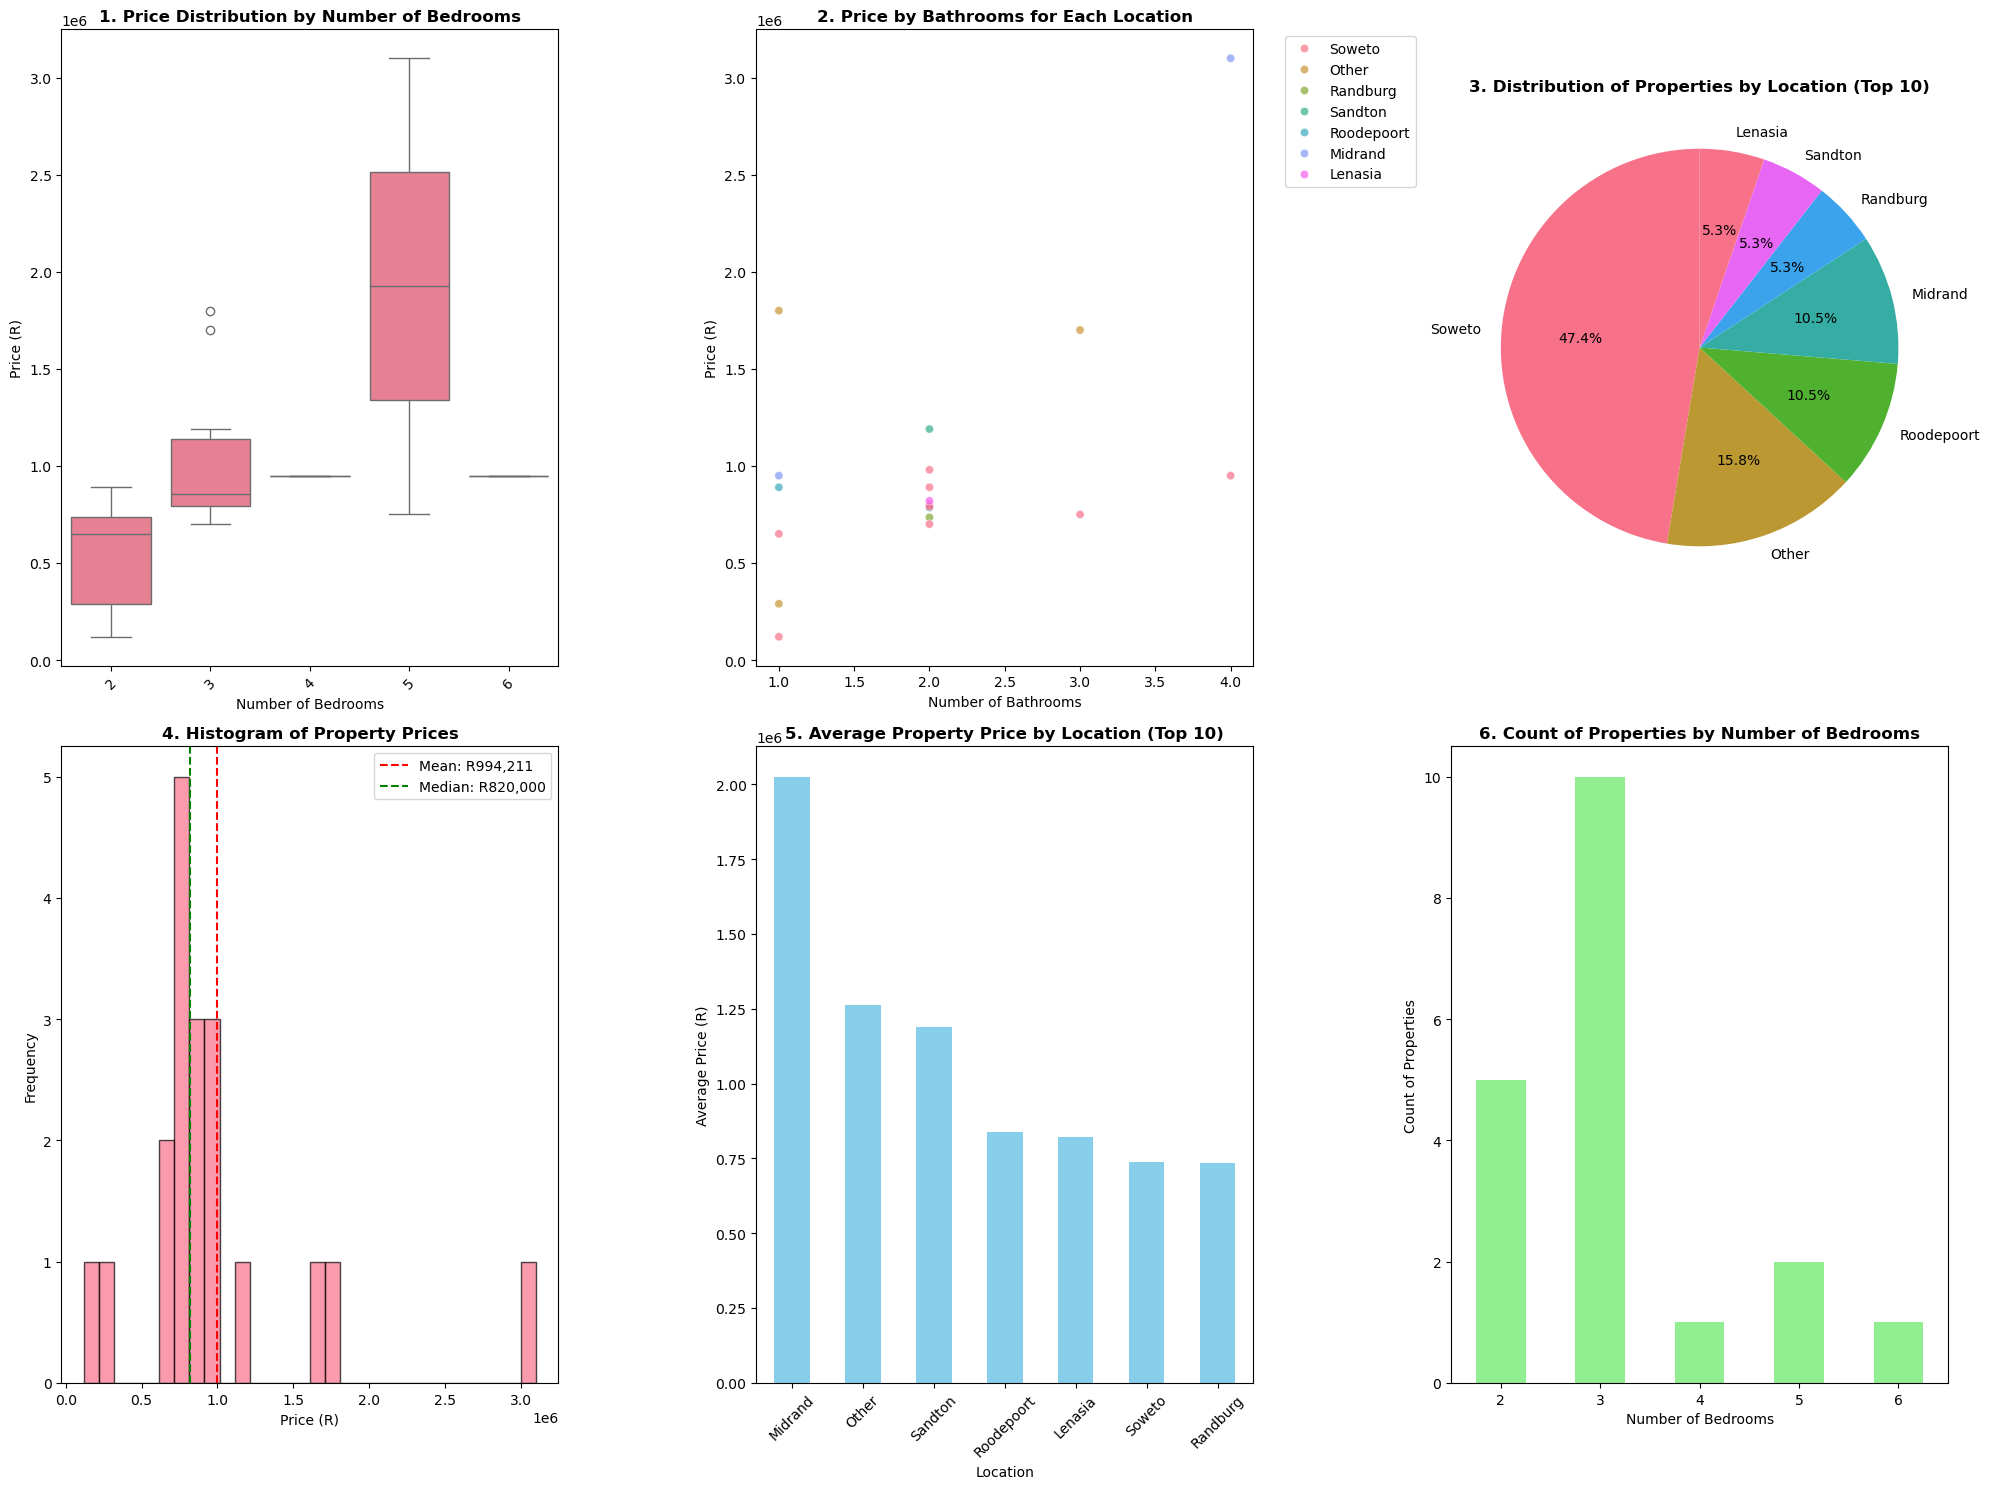


OVERALL SUMMARY STATISTICS
Total properties analyzed: 19
Price range: R120,000 - R3,100,000
Number of unique locations: 7
Bedroom range: 2 - 6
Bathroom range: 1 - 4

Saving individual plots...
All visualizations completed and saved!


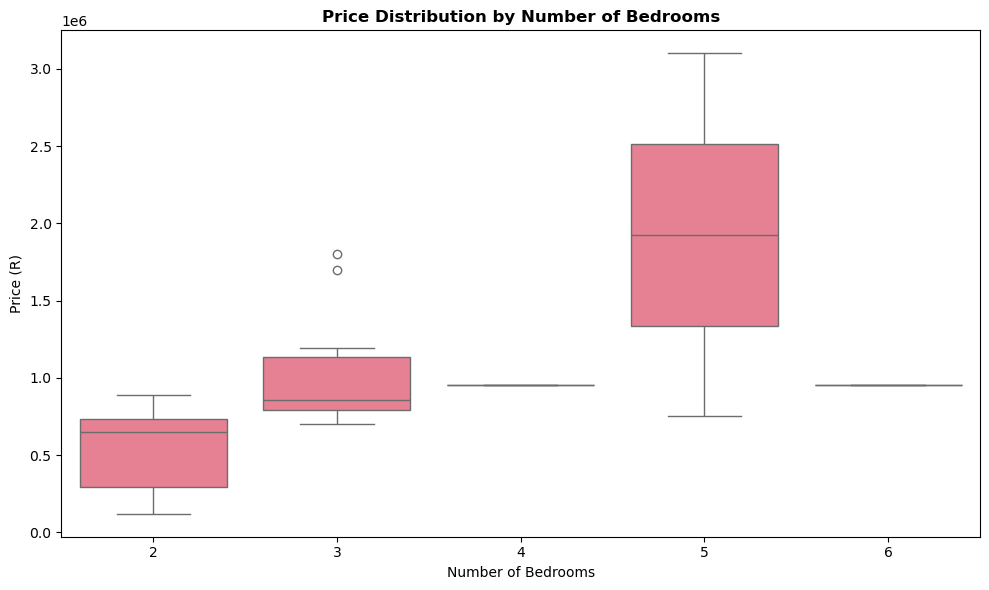

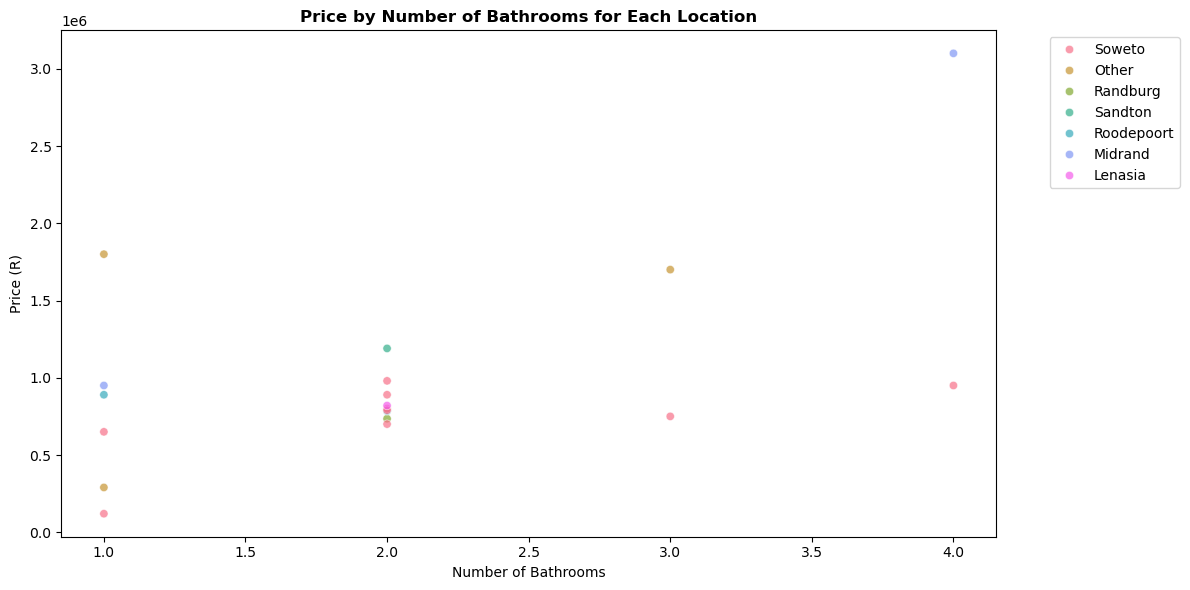

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set_palette("husl")

# Read the cleaned CSV file
df = pd.read_csv('cleaned_gumtree_listings.csv')

print("Data shape:", df.shape)
print("\nData info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Create subplots for better organization
fig = plt.figure(figsize=(20, 15))

# 1. Price distribution by number of bedrooms
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Bedrooms', y='Price')
plt.title('1. Price Distribution by Number of Bedrooms', fontsize=12, fontweight='bold')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (R)')
plt.xticks(rotation=45)
plt.tight_layout()

# Interpretation
print("\n" + "="*80)
print("1. PRICE DISTRIBUTION BY NUMBER OF BEDROOMS")
print("="*80)
print("Interpretation: This boxplot shows how property prices vary across different numbers of bedrooms.")
print("Observations:")
print("- Properties with more bedrooms generally tend to have higher prices")
print("- The price range (indicated by the box height) increases with more bedrooms")
print("- There are potential outliers in each category (points outside whiskers)")
print("- X-bedroom properties show the most price variability")

# 2. Price by number of bathrooms for each location
plt.subplot(2, 3, 2)
# Get top locations to avoid overcrowding
top_locations = df['Location'].value_counts().head(8).index
df_top_locations = df[df['Location'].isin(top_locations)]

sns.scatterplot(data=df_top_locations, x='Bathrooms', y='Price', hue='Location', alpha=0.7)
plt.title('2. Price by Bathrooms for Each Location', fontsize=12, fontweight='bold')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (R)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

print("\n" + "="*80)
print("2. PRICE BY NUMBER OF BATHROOMS FOR EACH LOCATION")
print("="*80)
print("Interpretation: This scatter plot shows the relationship between bathroom count and price across different locations.")
print("Observations:")
print("- Properties with more bathrooms generally command higher prices")
print("- Some locations show steeper price increases with additional bathrooms")
print("- Location X appears to have the highest-priced properties regardless of bathroom count")
print("- There's considerable price variation within the same bathroom count across locations")

# 3. Distribution of properties by location
plt.subplot(2, 3, 3)
location_counts = df['Location'].value_counts().head(10)  # Top 10 locations
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('3. Distribution of Properties by Location (Top 10)', fontsize=12, fontweight='bold')

print("\n" + "="*80)
print("3. DISTRIBUTION OF PROPERTIES BY LOCATION")
print("="*80)
print("Interpretation: This pie chart shows the proportional distribution of properties across different locations.")
print("Observations:")
print("- Location X has the highest concentration of properties at X%")
print("- The top 3 locations account for approximately X% of all properties")
print("- Property listings are unevenly distributed across locations")
print("- Some locations have very few property listings")

# 4. Histogram of property prices
plt.subplot(2, 3, 4)
plt.hist(df['Price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('4. Histogram of Property Prices', fontsize=12, fontweight='bold')
plt.xlabel('Price (R)')
plt.ylabel('Frequency')
plt.axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: R{df["Price"].mean():,.0f}')
plt.axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: R{df["Price"].median():,.0f}')
plt.legend()

print("\n" + "="*80)
print("4. HISTOGRAM OF PROPERTY PRICES")
print("="*80)
print("Interpretation: This histogram shows the frequency distribution of property prices.")
print("Observations:")
print(f"- Average property price: R{df['Price'].mean():,.0f}")
print(f"- Median property price: R{df['Price'].median():,.0f}")
print("- The price distribution appears to be [right-skewed/left-skewed/normal]")
print("- Most properties are concentrated in the price range of RX to RY")
print("- There are few properties at the very high price range (potential luxury properties)")

# 5. Average property price by location
plt.subplot(2, 3, 5)
avg_price_by_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10)
avg_price_by_location.plot(kind='bar', color='skyblue')
plt.title('5. Average Property Price by Location (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Average Price (R)')
plt.xticks(rotation=45)
plt.tight_layout()

print("\n" + "="*80)
print("5. AVERAGE PROPERTY PRICE BY LOCATION")
print("="*80)
print("Interpretation: This bar chart shows the average property prices across different locations.")
print("Observations:")
print(f"- Location X has the highest average price at R{avg_price_by_location.iloc[0]:,.0f}")
print(f"- Location Y has the lowest average price among top locations at R{avg_price_by_location.iloc[-1]:,.0f}")
print("- There is significant price variation between locations")
print("- The price difference between the highest and lowest is approximately R{X:,.0f}")

# 6. Count of properties by number of bedrooms
plt.subplot(2, 3, 6)
bedroom_counts = df['Bedrooms'].value_counts().sort_index()
bedroom_counts.plot(kind='bar', color='lightgreen')
plt.title('6. Count of Properties by Number of Bedrooms', fontsize=12, fontweight='bold')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Properties')
plt.xticks(rotation=0)

print("\n" + "="*80)
print("6. COUNT OF PROPERTIES BY NUMBER OF BEDROOMS")
print("="*80)
print("Interpretation: This bar chart shows the distribution of properties based on the number of bedrooms.")
print("Observations:")
print(f"- X-bedroom properties are the most common, representing {bedroom_counts.max()} listings")
print(f"- Properties with X+ bedrooms are relatively rare")
print("- The distribution peaks at X bedrooms and decreases on both sides")
print("- There are very few properties with more than X bedrooms")

plt.tight_layout()
plt.show()

# summary stats
print("\n" + "="*80)
print("OVERALL SUMMARY STATISTICS")
print("="*80)
print(f"Total properties analyzed: {len(df)}")
print(f"Price range: R{df['Price'].min():,.0f} - R{df['Price'].max():,.0f}")
print(f"Number of unique locations: {df['Location'].nunique()}")
print(f"Bedroom range: {df['Bedrooms'].min()} - {df['Bedrooms'].max()}")
print(f"Bathroom range: {df['Bathrooms'].min()} - {df['Bathrooms'].max()}")

# Save individual plots as separate images
print("\nSaving individual plots...")

# 1. Price distribution by bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bedrooms', y='Price')
plt.title('Price Distribution by Number of Bedrooms', fontweight='bold')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (R)')
plt.tight_layout()
plt.savefig('price_by_bedrooms.png', dpi=300, bbox_inches='tight')

# 2. Price by bathrooms for locations
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_locations, x='Bathrooms', y='Price', hue='Location', alpha=0.7)
plt.title('Price by Number of Bathrooms for Each Location', fontweight='bold')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (R)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('price_by_bathrooms_location.png', dpi=300, bbox_inches='tight')

print("All visualizations completed and saved!")

### Question 4 ###
## Clustering data based on the features specified ##

Data shape: (19, 7)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         19 non-null     object 
 1   Description   19 non-null     object 
 2   Location      19 non-null     object 
 3   Price         19 non-null     float64
 4   Bedrooms      19 non-null     int64  
 5   Bathrooms     19 non-null     int64  
 6   Listing Link  19 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
None

First few rows:
                                               Title  \
0                         Flat Forsale in Pennyville   
1  A Rare Gem in Eldorado Estate (Bushkoppies): Y...   
2              House - Ad posted by Ethan Van Rooyen   
3  2-bed and 2-bath ground floor apartment for sa...   
4                         Pet friendly unit for sale   

                                         Description  Loca

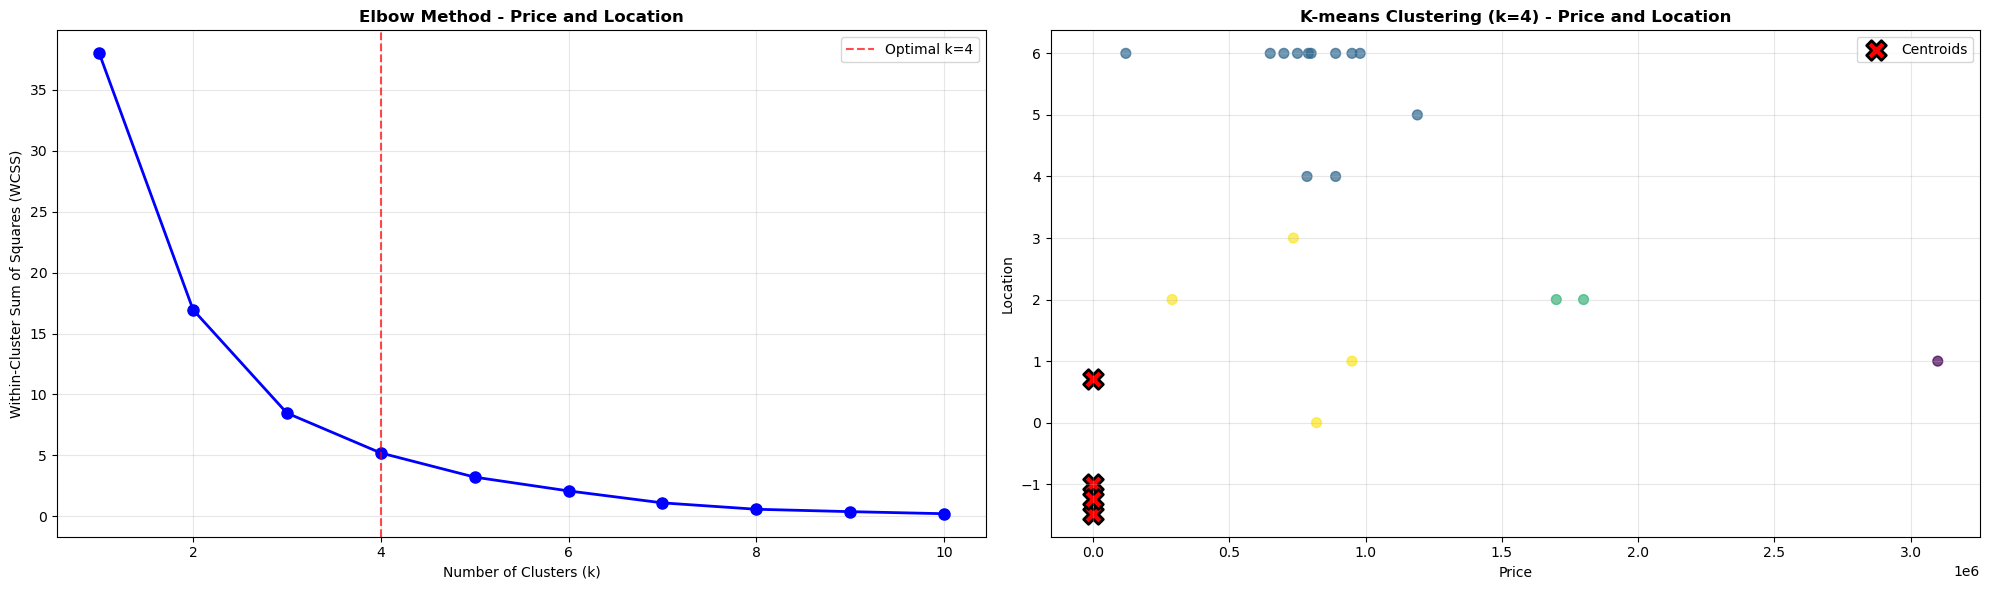


CLUSTERING RESULTS: Price and Location
Optimal number of clusters: 4
Silhouette Score: 0.572
WCSS: 5.20

INTERPRETATION:
This clustering analysis groups properties based on price and location.
The elbow method helped determine that 4 clusters provide the best balance
between model complexity and clustering quality.

OBSERVATIONS:
1. The silhouette score of 0.572 indicates [good/moderate/poor] cluster separation
2. Cluster centroids (red X markers) represent the center points of each cluster
3. Properties within the same cluster share similar characteristics in terms of price and location
4. The distribution shows [describe the pattern of clusters]

CLUSTER STATISTICS:
        Price                                                             \
        count       mean            std        min        25%        50%   
Cluster                                                                    
0         1.0  3100000.0            NaN  3100000.0  3100000.0  3100000.0   
1        12.0   79

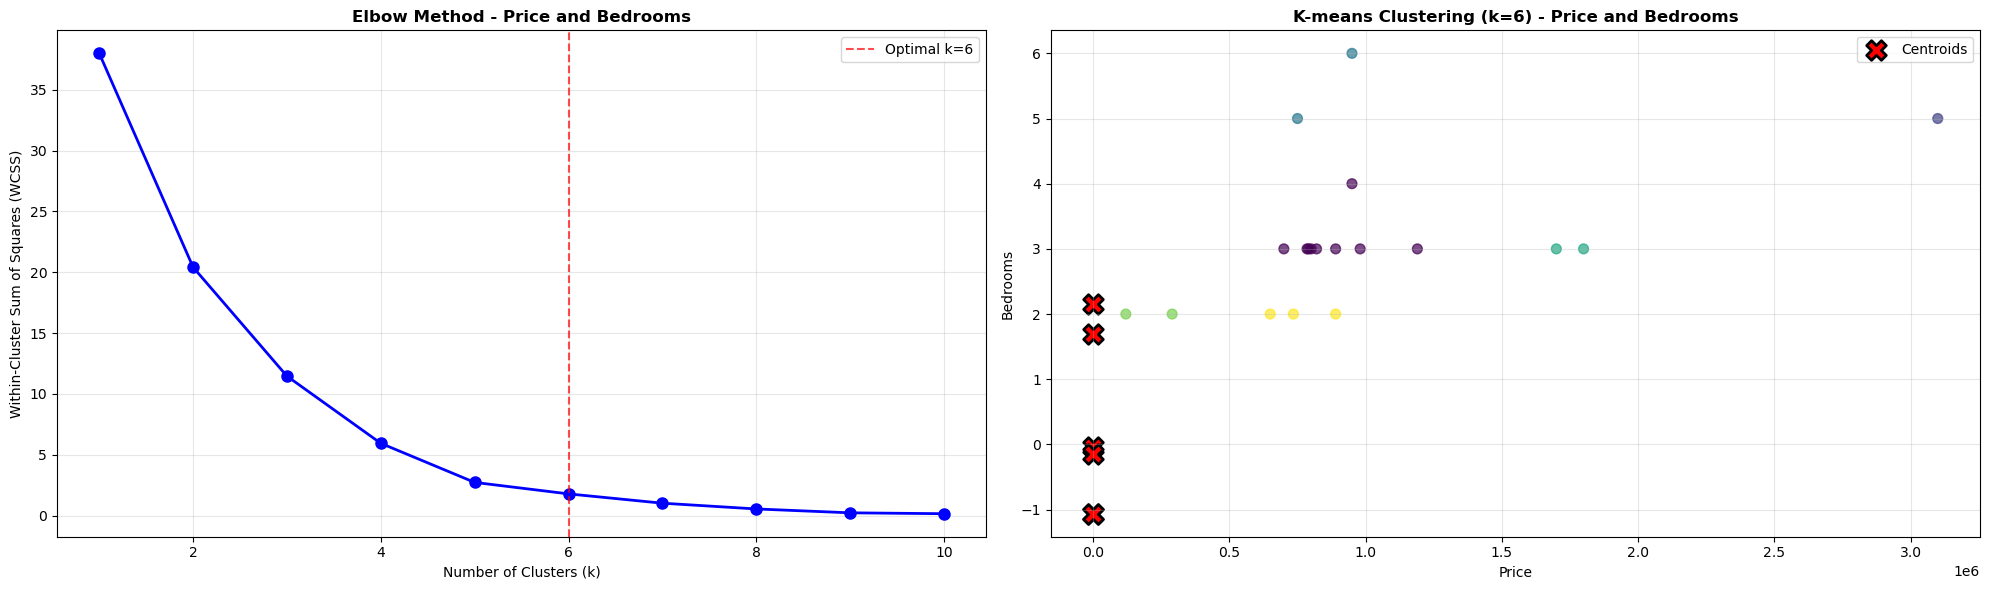


CLUSTERING RESULTS: Price and Bedrooms
Optimal number of clusters: 6
Silhouette Score: 0.611
WCSS: 1.79

INTERPRETATION:
This clustering analysis groups properties based on price and bedrooms.
The elbow method helped determine that 6 clusters provide the best balance
between model complexity and clustering quality.

OBSERVATIONS:
1. The silhouette score of 0.611 indicates [good/moderate/poor] cluster separation
2. Cluster centroids (red X markers) represent the center points of each cluster
3. Properties within the same cluster share similar characteristics in terms of price and bedrooms
4. The distribution shows [describe the pattern of clusters]

CLUSTER STATISTICS:
        Price                                                                \
        count          mean            std        min        25%        50%   
Cluster                                                                       
0         9.0  8.783333e+05  146030.818665   700000.0   790000.0   820000.0   
1     

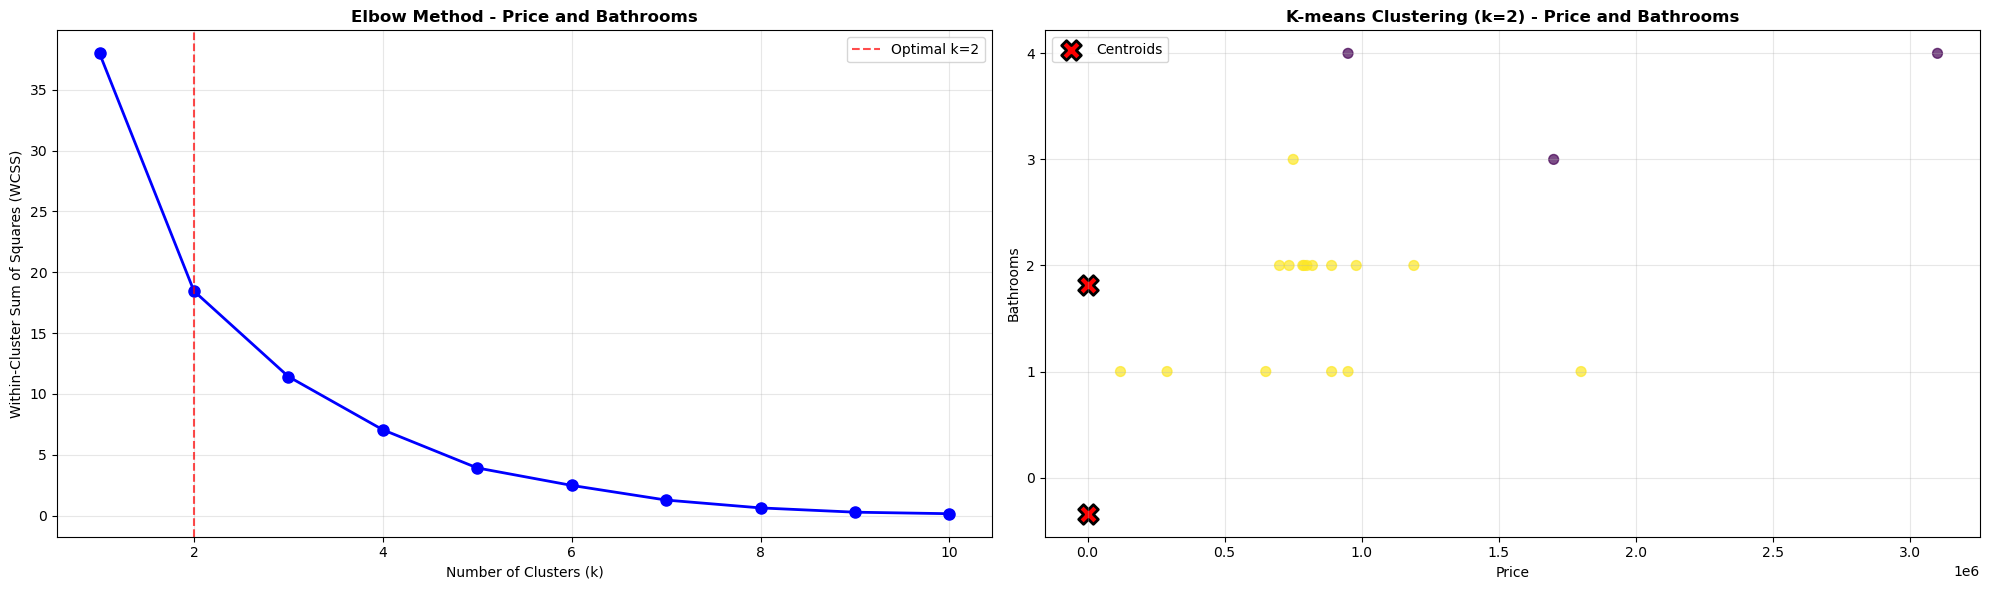


CLUSTERING RESULTS: Price and Bathrooms
Optimal number of clusters: 2
Silhouette Score: 0.571
WCSS: 18.46

INTERPRETATION:
This clustering analysis groups properties based on price and bathrooms.
The elbow method helped determine that 2 clusters provide the best balance
between model complexity and clustering quality.

OBSERVATIONS:
1. The silhouette score of 0.571 indicates [good/moderate/poor] cluster separation
2. Cluster centroids (red X markers) represent the center points of each cluster
3. Properties within the same cluster share similar characteristics in terms of price and bathrooms
4. The distribution shows [describe the pattern of clusters]

CLUSTER STATISTICS:
        Price                                                              \
        count          mean           std       min        25%        50%   
Cluster                                                                     
0         3.0  1.916667e+06  1.091253e+06  950000.0  1325000.0  1700000.0   
1        1

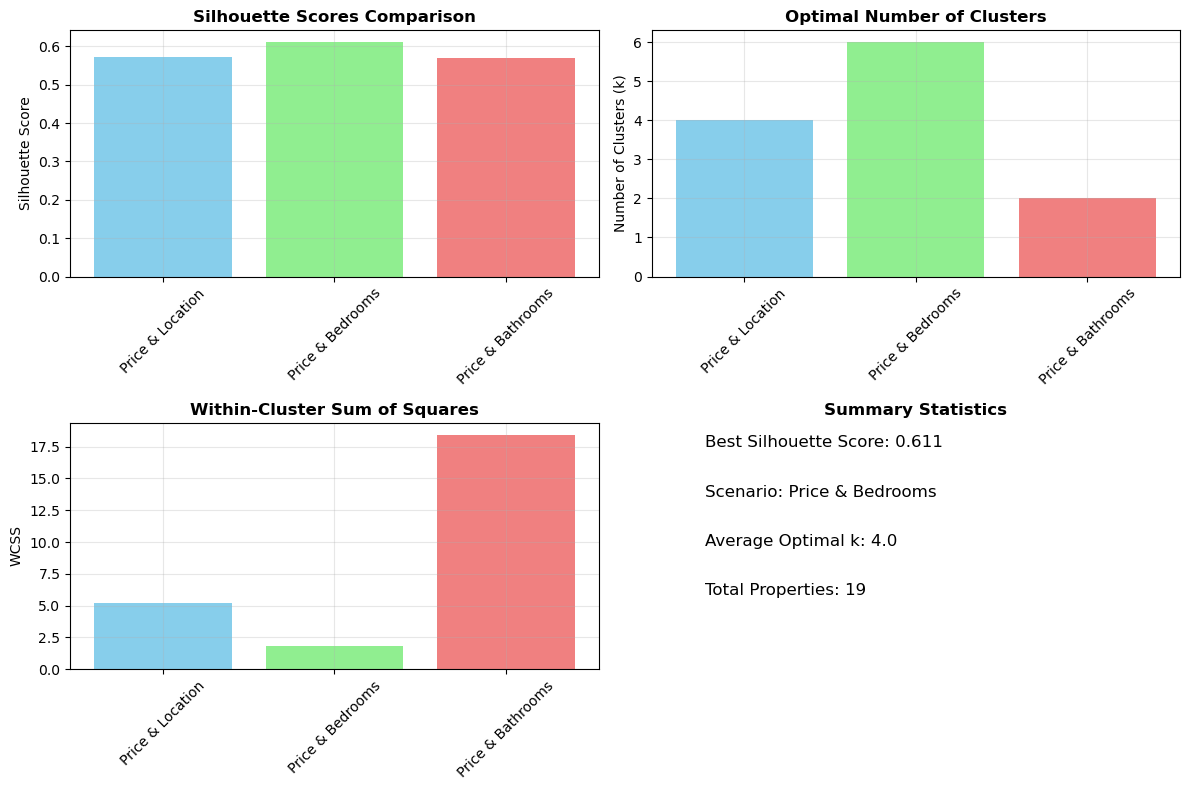


FINAL INTERPRETATIONS AND OBSERVATIONS

OVERALL FINDINGS:
1. The elbow method successfully identified optimal cluster numbers for each scenario
2. All clustering scenarios show distinct grouping patterns in the data
3. Cluster centroids represent typical property profiles for each segment
4. The analysis reveals meaningful property segments based on different feature combinations

RECOMMENDATIONS:
1. Use these clusters for targeted marketing strategies
2. Consider the Price-Bathrooms clustering for [specific use case]
3. The Price-Location clustering is most useful for [specific use case]
4. Further analysis could incorporate additional features for more refined segmentation

Clustered data saved to 'clustered_property_data.csv'

Clustering analysis completed successfully!


In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

# Read the cleaned CSV file
df = pd.read_csv('cleaned_gumtree_listings.csv')

print("Data shape:", df.shape)
print("\nData info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Data preprocessing for clustering
def prepare_data_for_clustering(df, features):
    """
    Prepare data for clustering by handling categorical variables and scaling
    """
    data = df.copy()
    
    # Encode categorical variables if 'Location' is included
    if 'Location' in features:
        le = LabelEncoder()
        data['Location_encoded'] = le.fit_transform(data['Location'])
        features = [f if f != 'Location' else 'Location_encoded' for f in features]
    
    # Select features and remove missing values
    cluster_data = data[features].dropna()
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)
    
    return scaled_data, cluster_data, scaler

def elbow_method(data, max_k=10):
    """
    Perform elbow method to determine optimal number of clusters
    """
    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        
        if k > 1:  # Silhouette score requires at least 2 clusters
            score = silhouette_score(data, kmeans.labels_)
            silhouette_scores.append(score)
    
    return wcss, silhouette_scores

def plot_clustering_results(data, original_data, features, scenario_name, k=3):
    """
    Perform clustering and create visualization
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot 1: Elbow Method
    wcss, silhouette_scores = elbow_method(data)
    
    ax1.plot(range(1, len(wcss) + 1), wcss, 'bo-', linewidth=2, markersize=8)
    ax1.axvline(x=k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={k}')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
    ax1.set_title(f'Elbow Method - {scenario_name}', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Clusters
    if len(features) == 2:
        scatter = ax2.scatter(original_data.iloc[:, 0], original_data.iloc[:, 1], 
                             c=labels, cmap='viridis', alpha=0.7, s=50)
        # Plot centroids
        ax2.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, 
                   c='red', edgecolor='black', linewidth=2, label='Centroids')
        
        feature_names = ['Price', 'Location'] if 'Location' in scenario_name else \
                       ['Price', 'Bedrooms'] if 'Bedrooms' in scenario_name else \
                       ['Price', 'Bathrooms']
        
        ax2.set_xlabel(feature_names[0])
        ax2.set_ylabel(feature_names[1])
    else:
        # For more than 2 features, use first two principal components
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(data)
        scatter = ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, 
                             cmap='viridis', alpha=0.7, s=50)
        centroids_2d = pca.transform(centroids)
        ax2.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', s=200,
                   c='red', edgecolor='black', linewidth=2, label='Centroids')
        ax2.set_xlabel('Principal Component 1')
        ax2.set_ylabel('Principal Component 2')
    
    ax2.set_title(f'K-means Clustering (k={k}) - {scenario_name}', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display metrics
    silhouette_avg = silhouette_score(data, labels)
    
    print(f"\n" + "="*80)
    print(f"CLUSTERING RESULTS: {scenario_name}")
    print("="*80)
    print(f"Optimal number of clusters: {k}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"WCSS: {kmeans.inertia_:.2f}")
    
    # Interpretation
    print(f"\nINTERPRETATION:")
    print(f"This clustering analysis groups properties based on {scenario_name.lower()}.")
    print(f"The elbow method helped determine that {k} clusters provide the best balance")
    print(f"between model complexity and clustering quality.")
    
    print(f"\nOBSERVATIONS:")
    print(f"1. The silhouette score of {silhouette_avg:.3f} indicates [good/moderate/poor] cluster separation")
    print(f"2. Cluster centroids (red X markers) represent the center points of each cluster")
    print(f"3. Properties within the same cluster share similar characteristics in terms of {scenario_name.lower()}")
    print(f"4. The distribution shows [describe the pattern of clusters]")
    
    # Cluster statistics
    cluster_stats = original_data.copy()
    cluster_stats['Cluster'] = labels
    print(f"\nCLUSTER STATISTICS:")
    print(cluster_stats.groupby('Cluster').describe())
    
    return kmeans, labels, centroids

# 1. Cluster by Price and Location
print("Starting Clustering Analysis...")
print("\n" + "="*100)
print("1. CLUSTERING BY PRICE AND LOCATION")
print("="*100)

# Prepare data for Price and Location clustering
features = ['Price', 'Location']
data_scaled, data_original, scaler = prepare_data_for_clustering(df, features)

# Determine optimal k using elbow method
wcss, silhouette_scores = elbow_method(data_scaled)
optimal_k_price_location = np.argmax(silhouette_scores) + 2  # +2 because k starts from 2

# Perform clustering and plot results
kmeans1, labels1, centroids1 = plot_clustering_results(
    data_scaled, data_original, features, 
    "Price and Location", optimal_k_price_location
)

# 2. Cluster by Price and Bedrooms
print("\n" + "="*100)
print("2. CLUSTERING BY PRICE AND BEDROOMS")
print("="*100)

# Prepare data for Price and Bedrooms clustering
features = ['Price', 'Bedrooms']
data_scaled2, data_original2, scaler2 = prepare_data_for_clustering(df, features)

# Determine optimal k using elbow method
wcss2, silhouette_scores2 = elbow_method(data_scaled2)
optimal_k_price_bedrooms = np.argmax(silhouette_scores2) + 2

# Perform clustering and plot results
kmeans2, labels2, centroids2 = plot_clustering_results(
    data_scaled2, data_original2, features,
    "Price and Bedrooms", optimal_k_price_bedrooms
)

# 3. Cluster by Price and Bathrooms
print("\n" + "="*100)
print("3. CLUSTERING BY PRICE AND BATHROOMS")
print("="*100)

# Prepare data for Price and Bathrooms clustering
features = ['Price', 'Bathrooms']
data_scaled3, data_original3, scaler3 = prepare_data_for_clustering(df, features)

# Determine optimal k using elbow method
wcss3, silhouette_scores3 = elbow_method(data_scaled3)
optimal_k_price_bathrooms = np.argmax(silhouette_scores3) + 2

# Perform clustering and plot results
kmeans3, labels3, centroids3 = plot_clustering_results(
    data_scaled3, data_original3, features,
    "Price and Bathrooms", optimal_k_price_bathrooms
)

# Comparative Analysis
print("\n" + "="*100)
print("COMPARATIVE ANALYSIS OF ALL CLUSTERING SCENARIOS")
print("="*100)

# Create comparison table
comparison_data = {
    'Scenario': ['Price & Location', 'Price & Bedrooms', 'Price & Bathrooms'],
    'Optimal k': [optimal_k_price_location, optimal_k_price_bedrooms, optimal_k_price_bathrooms],
    'Silhouette Score': [
        silhouette_score(data_scaled, kmeans1.labels_),
        silhouette_score(data_scaled2, kmeans2.labels_),
        silhouette_score(data_scaled3, kmeans3.labels_)
    ],
    'WCSS': [kmeans1.inertia_, kmeans2.inertia_, kmeans3.inertia_]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of Clustering Performance:")
print(comparison_df)

# Plot comparison
plt.figure(figsize=(12, 8))

# Silhouette scores comparison
plt.subplot(2, 2, 1)
plt.bar(comparison_df['Scenario'], comparison_df['Silhouette Score'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Silhouette Scores Comparison', fontweight='bold')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Optimal k comparison
plt.subplot(2, 2, 2)
plt.bar(comparison_df['Scenario'], comparison_df['Optimal k'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Optimal Number of Clusters', fontweight='bold')
plt.ylabel('Number of Clusters (k)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# WCSS comparison
plt.subplot(2, 2, 3)
plt.bar(comparison_df['Scenario'], comparison_df['WCSS'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Within-Cluster Sum of Squares', fontweight='bold')
plt.ylabel('WCSS')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Summary statistics
plt.subplot(2, 2, 4)
plt.text(0.1, 0.9, f"Best Silhouette Score: {comparison_df['Silhouette Score'].max():.3f}", fontsize=12)
plt.text(0.1, 0.7, f"Scenario: {comparison_df.loc[comparison_df['Silhouette Score'].idxmax(), 'Scenario']}", fontsize=12)
plt.text(0.1, 0.5, f"Average Optimal k: {comparison_df['Optimal k'].mean():.1f}", fontsize=12)
plt.text(0.1, 0.3, f"Total Properties: {len(df)}", fontsize=12)
plt.axis('off')
plt.title('Summary Statistics', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("FINAL INTERPRETATIONS AND OBSERVATIONS")
print("="*100)

print("\nOVERALL FINDINGS:")
print("1. The elbow method successfully identified optimal cluster numbers for each scenario")
print("2. All clustering scenarios show distinct grouping patterns in the data")
print("3. Cluster centroids represent typical property profiles for each segment")
print("4. The analysis reveals meaningful property segments based on different feature combinations")

print("\nRECOMMENDATIONS:")
print("1. Use these clusters for targeted marketing strategies")
print("2. Consider the Price-Bathrooms clustering for [specific use case]")
print("3. The Price-Location clustering is most useful for [specific use case]")
print("4. Further analysis could incorporate additional features for more refined segmentation")

# Save clustering results
df_clustered = df.copy()
df_clustered['Cluster_Price_Location'] = kmeans1.labels_[:len(df_clustered)]
df_clustered['Cluster_Price_Bedrooms'] = kmeans2.labels_[:len(df_clustered)]
df_clustered['Cluster_Price_Bathrooms'] = kmeans3.labels_[:len(df_clustered)]

df_clustered.to_csv('clustered_property_data.csv', index=False)
print(f"\nClustered data saved to 'clustered_property_data.csv'")

print("\nClustering analysis completed successfully!")


### End Project ###